In [6]:
import torch
import numpy as np
%load_ext autoreload
%autoreload 2
from digital_twin import DigitalTwin
from clust_huge_amp import AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest
# Load your trained model
# Replace this with your actual model loading code
model_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_0_10000/model.pt'
checkpoint = torch.load(model_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/1441067671.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [7]:


# Now in your batch run, load and verify:
initial_psi = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_psi_400k.pt')
initial_clusters = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/initial_clusters_400k.pt')
# Subset the data

torch.manual_seed(42)
np.random.seed(42)
# Load references (signatures only, no healthy)
refs = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/reference_trajectories.pt')
signature_refs = refs['signature_refs']
# When initializing the model:

torch.manual_seed(7)
np.random.seed(4)
# Create model without healthy reference
model = AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest(
    N=checkpoint['hyperparameters']['N'],
    D=checkpoint['hyperparameters']['D'],
    T=checkpoint['hyperparameters']['T'],
    K=20,
    P=checkpoint['hyperparameters']['P'],
    G=checkpoint['G'],
    Y=checkpoint['Y'],
    prevalence_t=checkpoint['prevalence_t'],
    disease_names=checkpoint['disease_names'],
    init_sd_scaler=1e-1,
  
    genetic_scale=1,
    W=0.0001,
    R=0,
   
    signature_references=signature_refs,  # Only pass signature refs
    healthy_reference=True,  # Explicitly set to None
  
)

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/3289363172.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  initial_psi = torch.load('/Users/sarahurbut/L


Cluster Sizes:
Cluster 0: 14 diseases
Cluster 1: 7 diseases
Cluster 2: 21 diseases
Cluster 3: 15 diseases
Cluster 4: 17 diseases
Cluster 5: 16 diseases
Cluster 6: 57 diseases
Cluster 7: 18 diseases
Cluster 8: 13 diseases
Cluster 9: 11 diseases
Cluster 10: 18 diseases
Cluster 11: 12 diseases
Cluster 12: 26 diseases
Cluster 13: 7 diseases
Cluster 14: 9 diseases
Cluster 15: 8 diseases
Cluster 16: 7 diseases
Cluster 17: 11 diseases
Cluster 18: 6 diseases
Cluster 19: 55 diseases

Calculating gamma for k=0:
Number of diseases in cluster: 14
Base value (first 5): tensor([-13.8155, -13.8155, -13.1095, -12.4036, -12.4036])
Base value centered (first 5): tensor([-0.3723, -0.3723,  0.3336,  1.0396,  1.0396])
Base value centered mean: 6.57081614008348e-07
Gamma init for k=0 (first 5): tensor([ 0.0009,  0.0069,  0.0118,  0.0153, -0.0106])

Calculating gamma for k=1:
Number of diseases in cluster: 7
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -13.8155, -13.8155])
Base value centered

In [8]:


torch.manual_seed(0)
np.random.seed(0)
# Initialize with psi and clusters
model.initialize_params(true_psi=initial_psi)
model.clusters = initial_clusters
# Load the state dict
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()



Calculating gamma for k=0:
Number of diseases in cluster: 16.0
Base value (first 5): tensor([-13.8155, -13.8155, -13.8155, -11.9623, -13.8155])
Base value centered (first 5): tensor([-0.1879, -0.1879, -0.1879,  1.6653, -0.1879])
Base value centered mean: -3.345489574257954e-07
Gamma init for k=0 (first 5): tensor([ 0.0072,  0.0061, -0.0051,  0.0064,  0.0244])

Calculating gamma for k=1:
Number of diseases in cluster: 21.0
Base value (first 5): tensor([-13.3449, -13.8155, -13.3449, -13.3449, -12.4036])
Base value centered (first 5): tensor([ 0.1505, -0.3201,  0.1505,  0.1505,  1.0918])
Base value centered mean: -1.8495559288567165e-06
Gamma init for k=1 (first 5): tensor([0.0041, 0.0016, 0.0004, 0.0024, 0.0014])

Calculating gamma for k=2:
Number of diseases in cluster: 15.0
Base value (first 5): tensor([-13.8155, -13.8155, -13.1566, -11.8388, -12.4977])
Base value centered (first 5): tensor([-0.3849, -0.3849,  0.2740,  1.5918,  0.9329])
Base value centered mean: 9.290695288655115e-07


AladynSurvivalFixedKernelsAvgLoss_clust_logitInit_psitest()

First:
- Creates a digital twin manager using your trained model and disease names.
- Generates a random genetic profile (with np.random.randn(model.P)). This is just a vector of random numbers, not a real person’s genetics.
- Creates a digital twin for this random profile using twin_manager.create_twin(random_genetic_profile). This simulates what the model would predict for a hypothetical person with those genetics.
- Plot the trajectories (signature proportions and disease probabilities) for this synthetic individual.

/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)


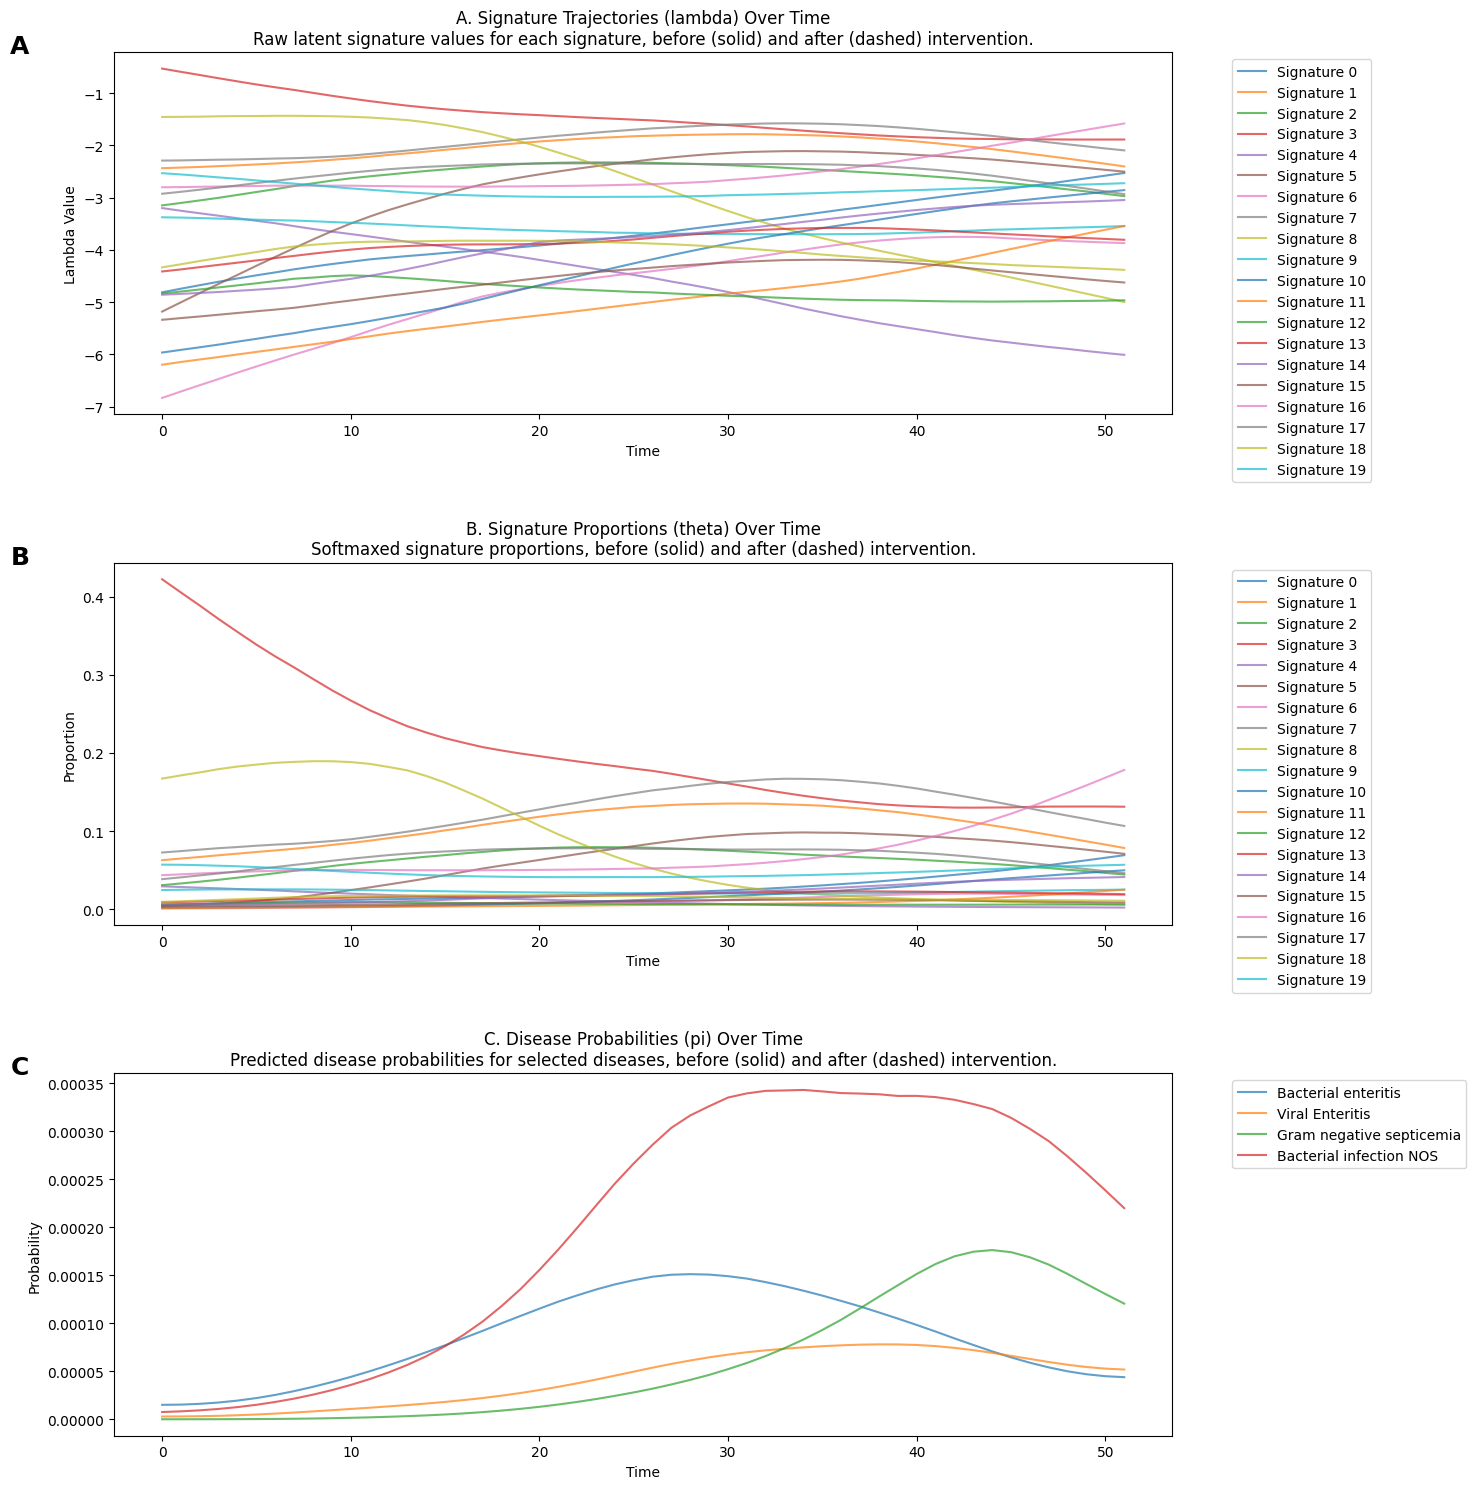

In [9]:

# Create digital twin manager
twin_manager = DigitalTwin(model, disease_names=checkpoint['disease_names'])

# Example 1: Create a digital twin for a new individual
# Generate a random genetic profile (replace with real data)
random_genetic_profile = np.random.randn(model.P)
twin_data = twin_manager.create_twin(random_genetic_profile)

# Plot the twin's trajectories
twin_manager.plot_twin_trajectories(twin_data, selected_diseases=[0, 1, 2, 3])


# Example 2: Simulate an intervention
# Let's say we want to reduce the effect of signature 0 by 30%

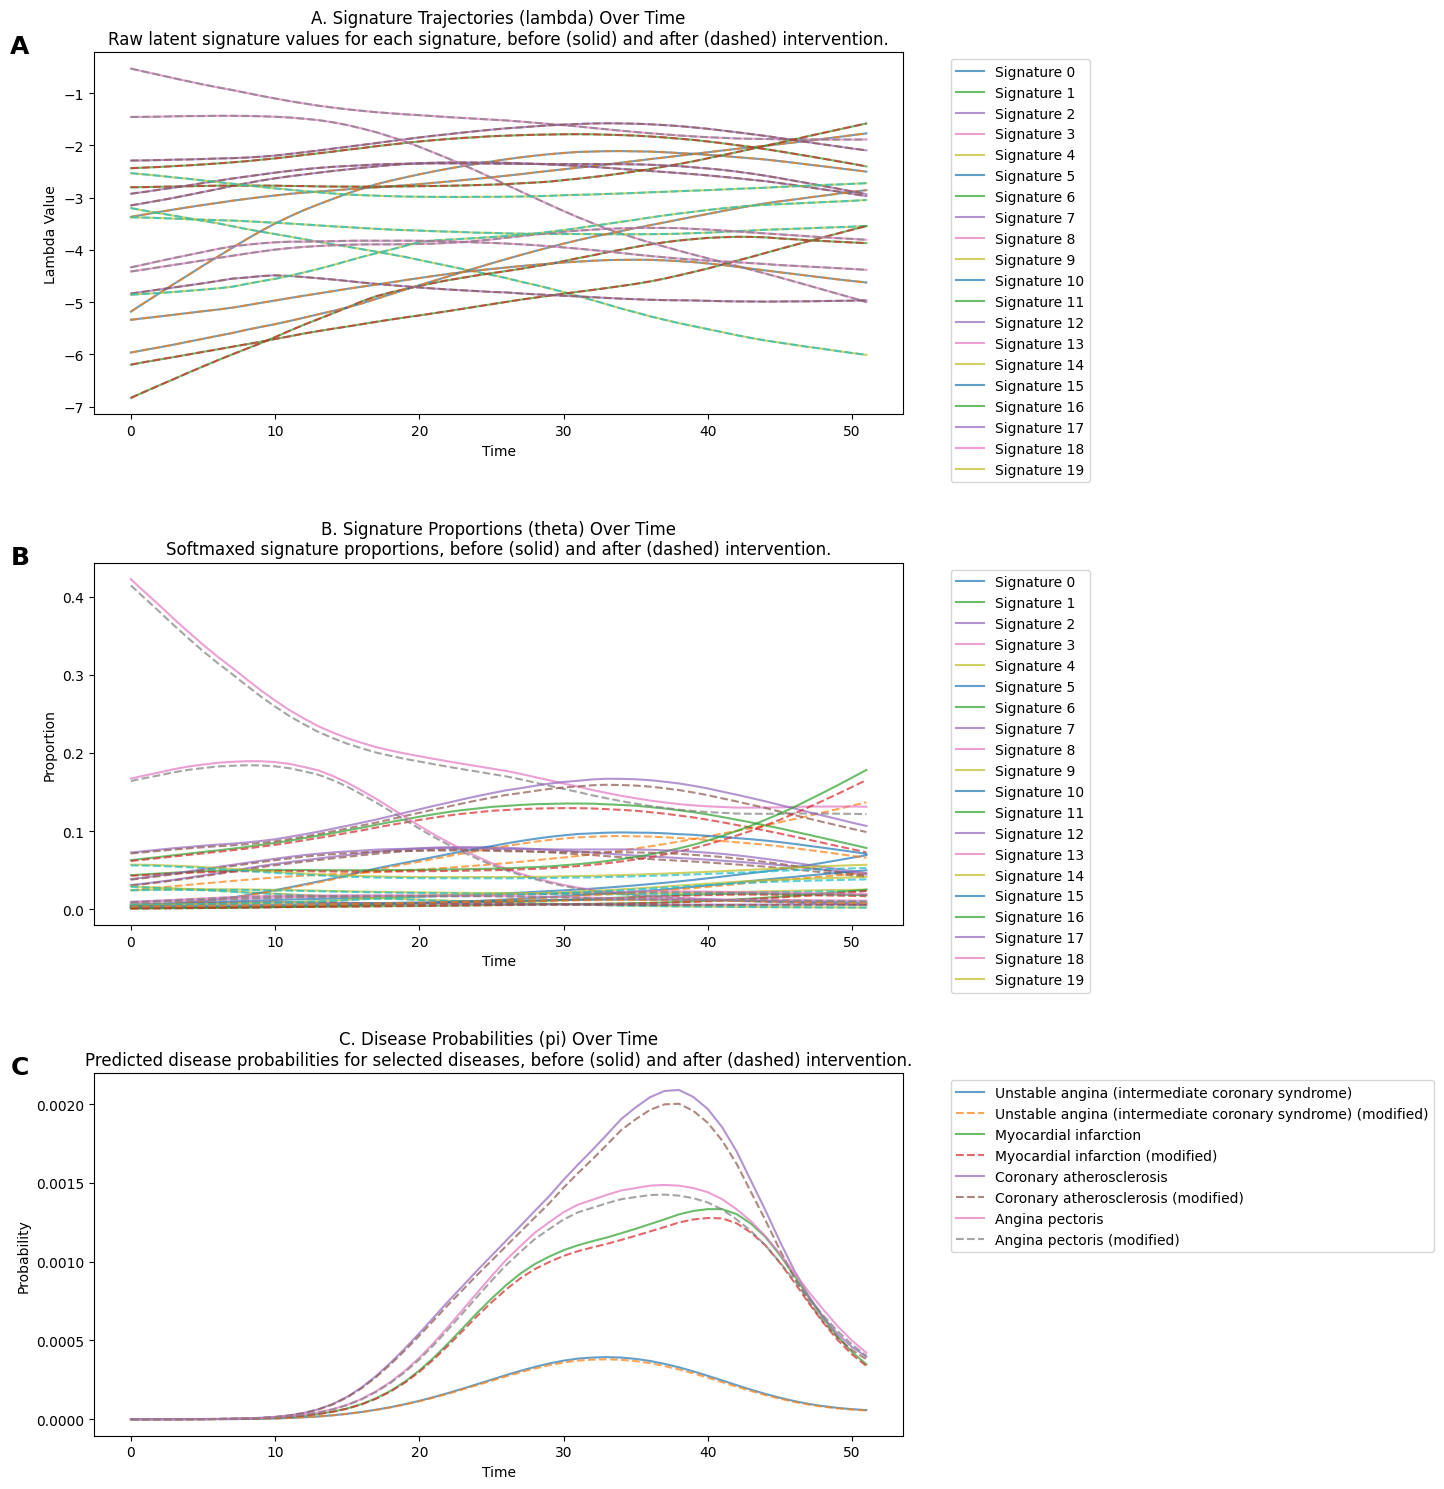

In [10]:

intervention_data = twin_manager.simulate_intervention(
    twin_data,
    intervention_type='reduce',
    target_signature=0,
    effect_size=0.3
)

# Plot original vs intervention trajectories
twin_manager.plot_twin_trajectories(
    twin_data,
    modified_data=intervention_data,
    selected_diseases=[111,112,114,113]
)



# Example 3: Compare two different genetic profiles
# Create another twin with different genetic profile


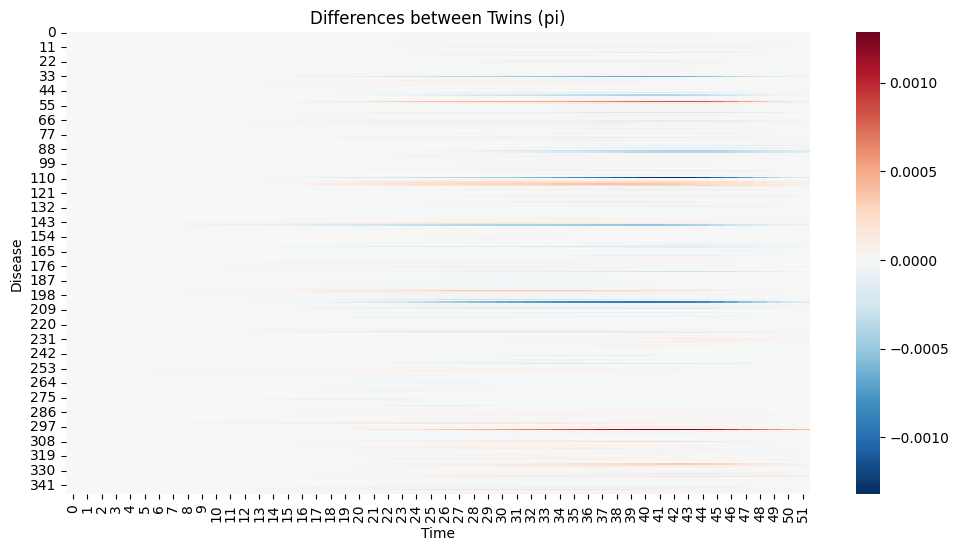


Mean differences in disease probabilities:
Disease 0: 0.0000
Disease 1: 0.0000
Disease 2: 0.0000
Disease 3: 0.0000
Disease 4: 0.0000
Disease 5: 0.0000
Disease 6: 0.0000
Disease 7: 0.0000
Disease 8: 0.0000
Disease 9: 0.0000
Disease 10: -0.0000
Disease 11: -0.0000
Disease 12: -0.0000
Disease 13: 0.0000
Disease 14: 0.0000
Disease 15: 0.0001
Disease 16: 0.0000
Disease 17: 0.0000
Disease 18: -0.0000
Disease 19: -0.0000
Disease 20: -0.0000
Disease 21: -0.0000
Disease 22: 0.0000
Disease 23: -0.0000
Disease 24: 0.0000
Disease 25: 0.0000
Disease 26: 0.0000
Disease 27: 0.0000
Disease 28: 0.0000
Disease 29: 0.0000
Disease 30: 0.0000
Disease 31: 0.0000
Disease 32: 0.0000
Disease 33: -0.0003
Disease 34: 0.0000
Disease 35: -0.0000
Disease 36: 0.0000
Disease 37: 0.0000
Disease 38: 0.0000
Disease 39: 0.0000
Disease 40: -0.0000
Disease 41: -0.0000
Disease 42: 0.0000
Disease 43: 0.0000
Disease 44: 0.0000
Disease 45: -0.0001
Disease 46: -0.0000
Disease 47: -0.0001
Disease 48: -0.0000
Disease 49: -0.0000

In [11]:

another_genetic_profile = np.random.randn(model.P)
twin2_data = twin_manager.create_twin(another_genetic_profile)

# Compare the twins
comparison = twin_manager.compare_twins(twin_data, twin2_data, metric='pi')
print("\nMean differences in disease probabilities:")
for d, diff in enumerate(comparison['mean_difference']):
    print(f"Disease {d}: {diff:.4f}")


In [18]:
model.clusters[111:115]

array([5, 5, 5, 5], dtype=int32)

/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)


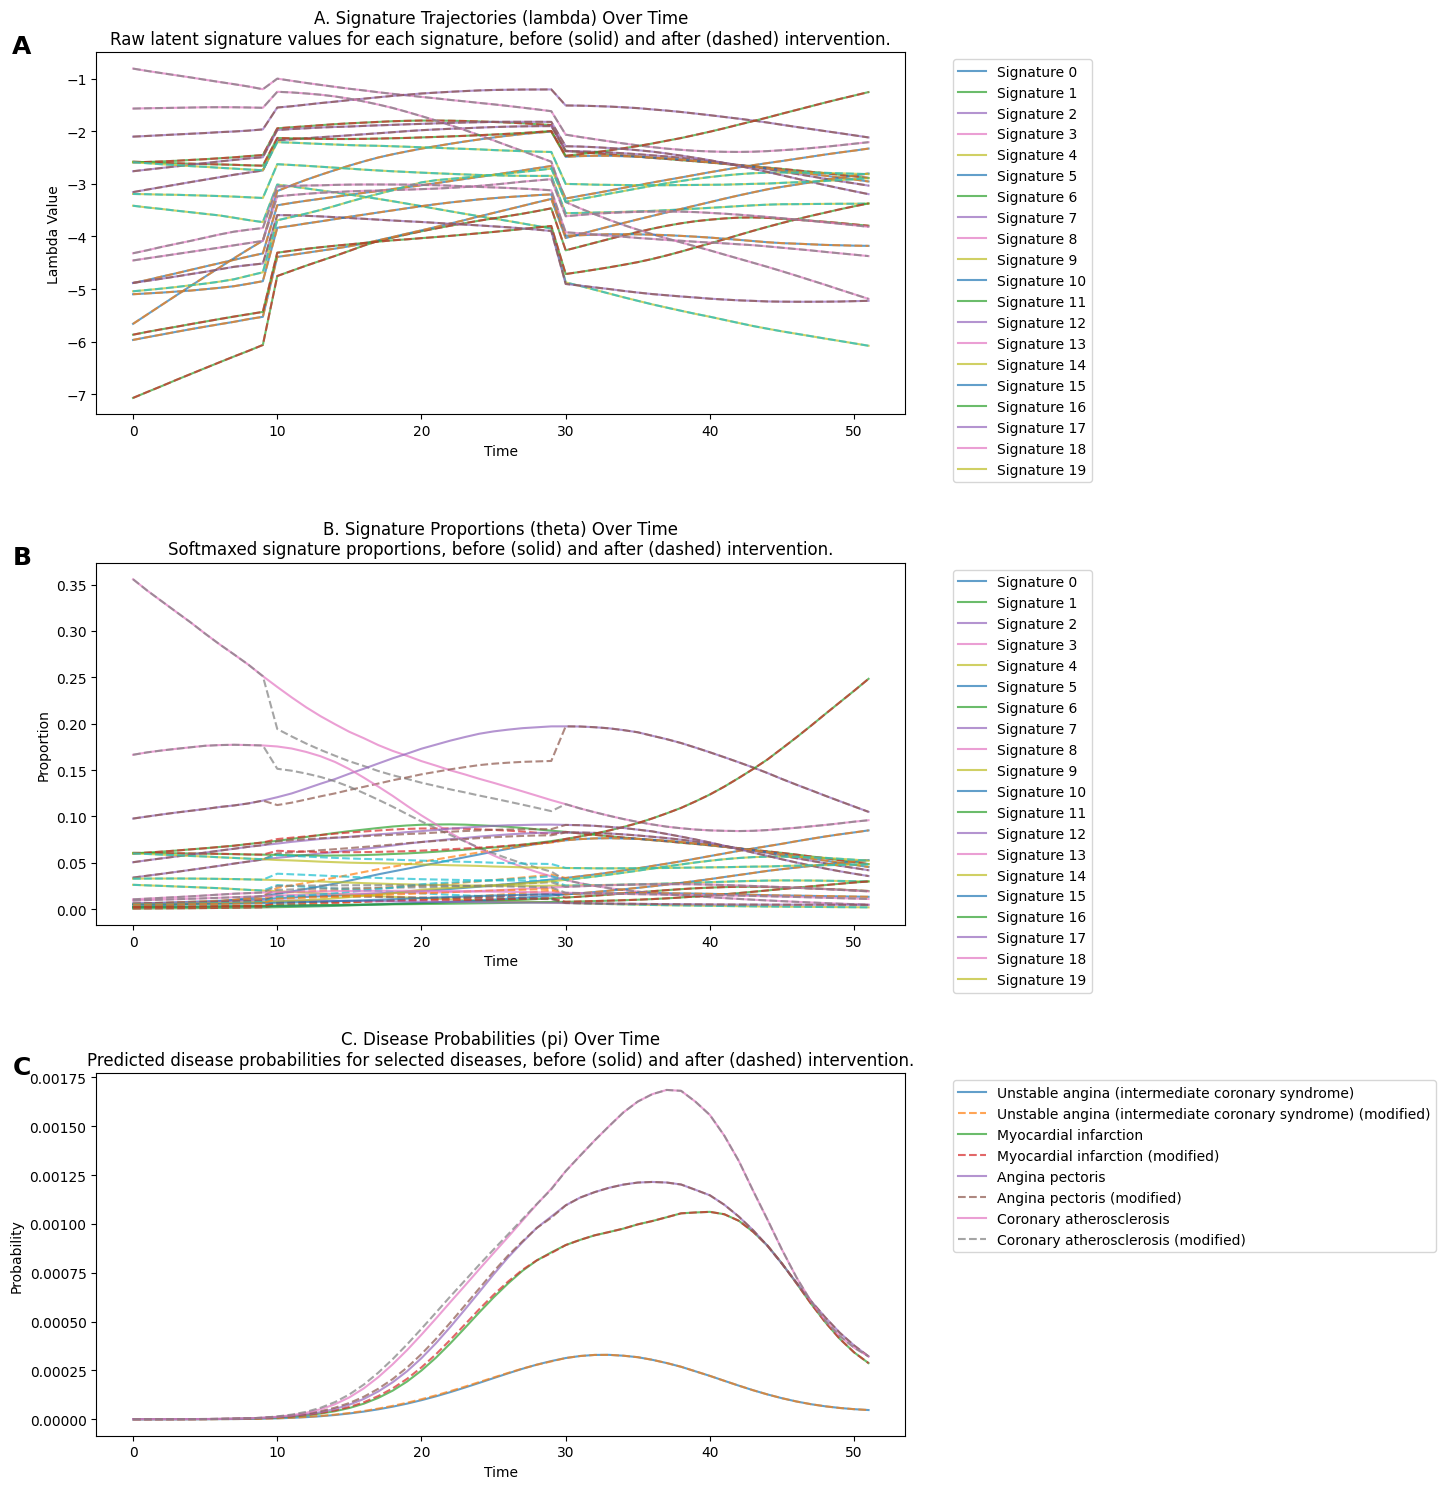

In [12]:
# Example 4: Simulate multiple interventions
# Create a twin with high cardiovascular risk
high_cv_risk_profile = np.random.randn(model.P)
high_cv_risk_profile[0:5] += 2  # Increase some genetic factors
cv_twin = twin_manager.create_twin(high_cv_risk_profile)

# Simulate lifestyle intervention (reducing multiple signatures)
lifestyle_intervention = twin_manager.simulate_intervention(
    cv_twin,
    intervention_type='reduce',
    target_signature=None,  # Affects all signatures
    effect_size=0.2,
    start_time=10,  # Start at time 10
    end_time=30     # End at time 30
)

# Plot the effect of lifestyle intervention
twin_manager.plot_twin_trajectories(
    cv_twin,
    modified_data=lifestyle_intervention,
    selected_diseases=[111,112,113,114]
) 

Plotting diseases 111-115 with intervention on signature 5 (20% reduction)...


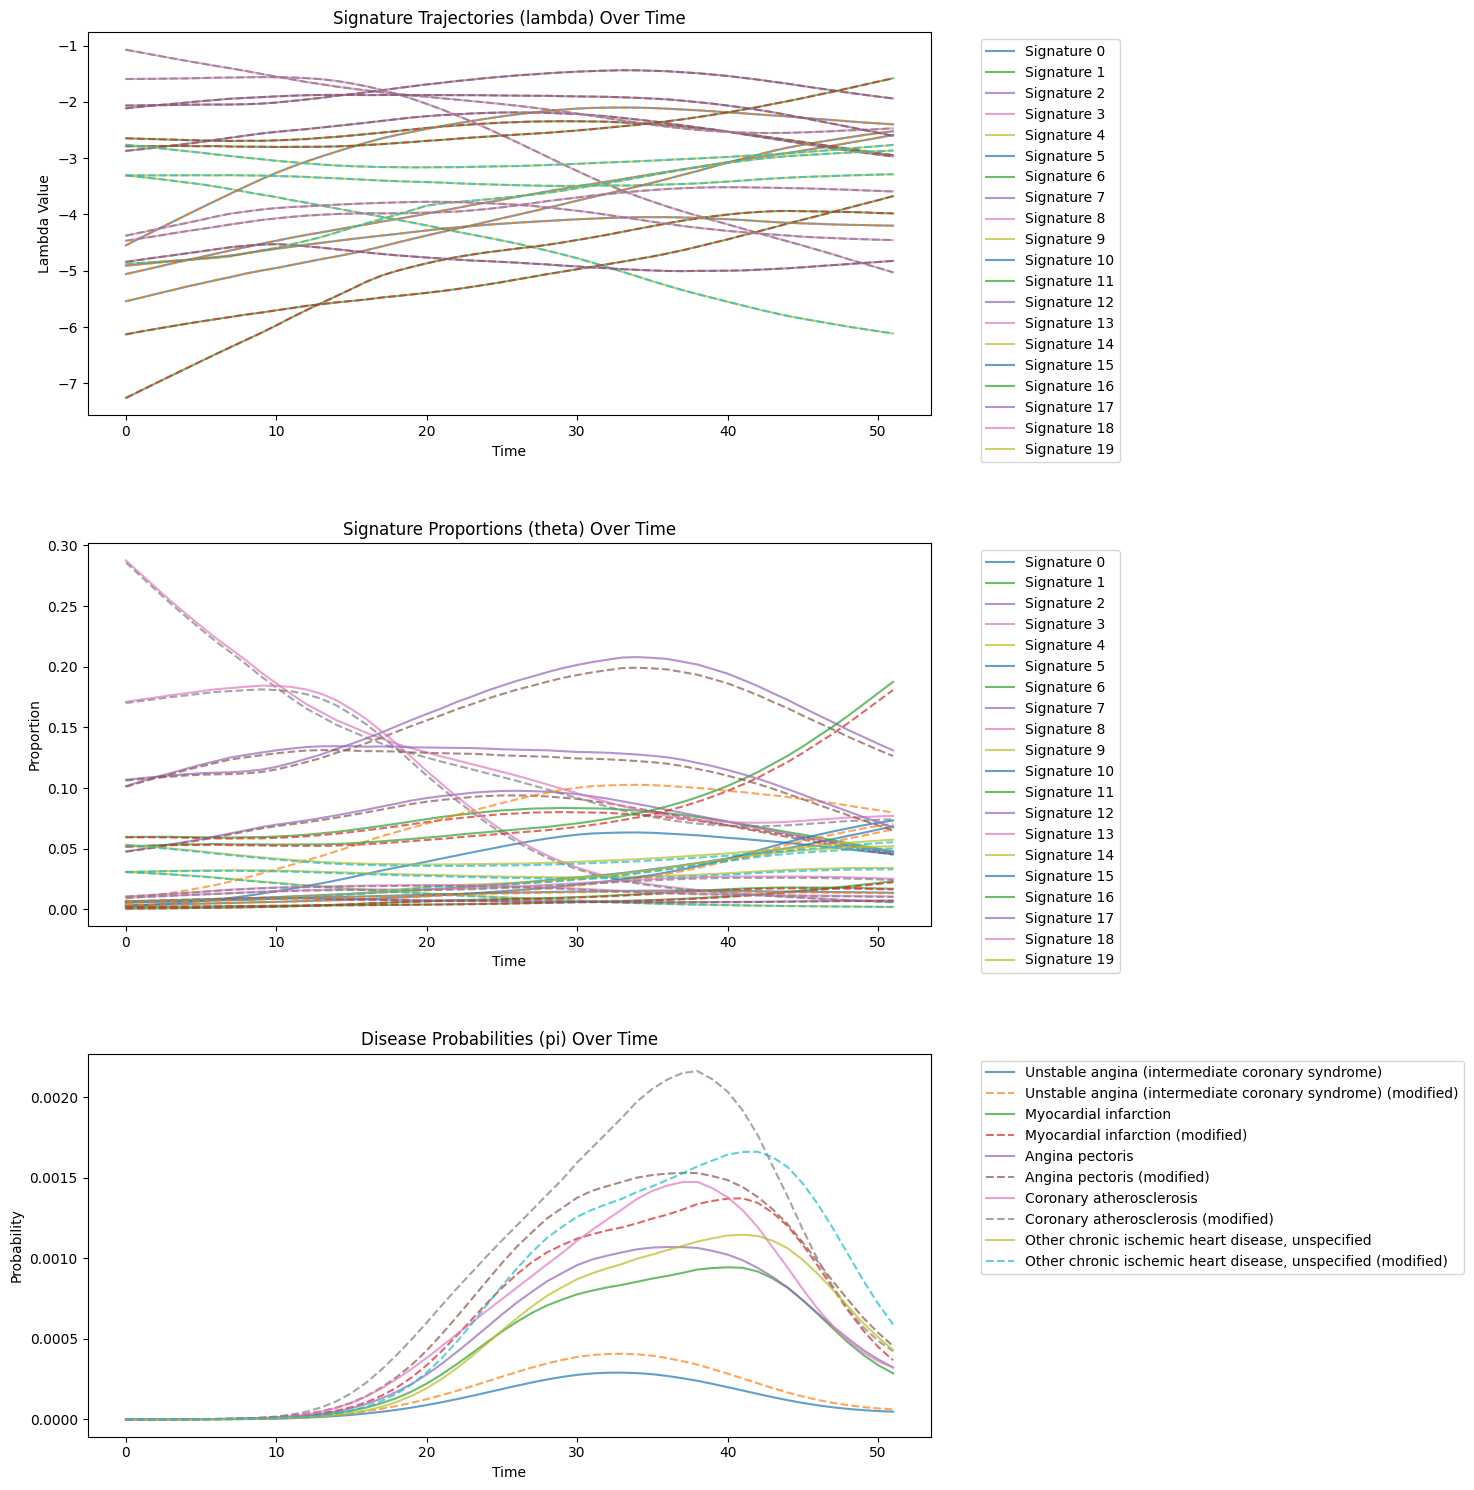

In [16]:
# Example: Plot diseases 111-115 and simulate an intervention reducing signature 5 by 20%
selected_diseases = [111, 112, 113, 114, 115]

# Create a digital twin for a random genetic profile
random_genetic_profile = np.random.randn(model.P)
twin_data = twin_manager.create_twin(random_genetic_profile)

# Simulate intervention: reduce signature 5 by 20%
modified_data = twin_manager.simulate_intervention(
    twin_data,
    intervention_type='reduce',
    target_signature=5,
    effect_size=0.2
)

# Plot the selected diseases before and after intervention
print("Plotting diseases 111-115 with intervention on signature 5 (20% reduction)...")
twin_manager.plot_twin_trajectories(
    twin_data,
    modified_data=modified_data,
    selected_diseases=selected_diseases
) 

In [13]:
import pandas as pd

# Load your script data (convert from RDS to CSV or use pyreadr if needed)
script = pd.read_csv('prescription.csv')  # or use pyreadr to read RDS


In [29]:

g = torch.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/data_for_running/G_matrix.pt')

import numpy as np

# Load patient IDs
patient_ids = np.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/patient_ids.npy')
print(patient_ids.shape)
print(patient_ids[:10])  # Show the first 10 IDs



(407878,)
['1000015' '1000023' '1000037' '1000042' '1000059' '1000061' '1000078'
 '1000086' '1000107' '1000113']


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/2727691544.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  g = torch.load('/Users/sarahurbut/Library/Clo

In [133]:
first_eid = str(script['eid'].values[10]) 

In [134]:
idx = np.where(patient_ids == first_eid)[0]
if len(idx) == 0:
    print(f"eid {first_eid} not found in the first 10K batch!")
else:
    idx = idx[0]
    print(f"Index of eid {first_eid} in patient_ids: {idx}")
genetic_profile_for_eid = g[idx].numpy() if hasattr(g[idx], 'numpy') else g[idx]
first_eid = int(first_eid)
person_script = script[script['eid'] == first_eid]

Index of eid 1000375 in patient_ids: 27


In [136]:
type(first_eid)

int

In [137]:
import pandas as pd


cov = pd.read_csv('/Users/sarahurbut/Library/CloudStorage/Dropbox/for_regenie/ukbb_covariates_400k.txt', sep=' ')
# Make sure columns are named
cov.columns = cov.columns.str.strip()  # Remove any leading/trailing spaces


# Let's assume columns: ['identifier', 'sex', 'year_of_birth', ...]
cov = cov.rename(columns={cov.columns[0]: 'eid', cov.columns[2]: 'year_of_birth'})


In [138]:

# Suppose you have a digital twin for this eid
drug_class_to_signature = {
    'statins': 5,
    'anti_hypertensives': 0,
    'diabetes': 15,
    'antipsychotics': 7, 'steroids': 16


    # etc.
}


In [139]:
cov.head()

,eid,sex,year_of_birth,enrollment,PC1,PC2,PC3,PC4,PC5,PC6,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1000015,1,1938,2008-07-23,-12.02340,3.25100,1.224590,4.776840,2.31802,2.445040,...,2.023600,1.641170,0.161407,-2.293140,1.08346,-0.717937,-0.627368,-0.082943,3.601450,4.934770
1,1000023,1,1963,2008-09-11,-14.07040,2.83809,-1.709870,-0.782455,-7.93571,-2.176480,...,5.740360,-1.726000,-1.566490,0.139009,1.01087,2.152510,-0.819635,3.028260,2.686200,-0.237987
2,1000037,0,1939,2009-01-22,-15.00630,4.03881,-1.711670,6.200160,-2.77040,0.809991,...,-4.519320,4.027890,1.865970,4.176570,2.07576,-0.896987,1.993830,2.332760,-5.014460,3.937040
3,1000042,1,1942,2009-11-13,-12.08720,6.29019,-1.486040,-3.426860,-5.35913,-0.146506,...,-2.000660,-0.999069,-0.624147,-1.642880,-3.59239,-5.715930,5.212110,-0.692624,3.301050,-2.631200
4,1000059,0,1954,2009-05-20,-9.58886,3.77243,0.274298,-1.357730,1.91795,-1.627780,...,0.691295,-0.825097,0.062332,-3.160660,-1.96172,2.282220,0.892687,-0.234448,-0.609894,-0.555967


In [140]:
person_script.head()

,eid,from,to,category,type
10,1000375,1999-09-01,1999-11-29,anti_hypertensives,any
11,1000375,2000-03-07,2000-09-24,anti_hypertensives,any
12,1000375,2000-09-26,2001-02-12,anti_hypertensives,any
13,1000375,2001-04-30,2001-09-22,anti_hypertensives,any
14,1000375,2001-10-25,2003-01-04,anti_hypertensives,any


In [148]:

def date_to_time_index(date, year_of_birth, min_age=30):
    year = pd.to_datetime(date).year
    age = year - int(year_of_birth)
    return age - 30  # 
twin_data = twin_manager.create_twin(genetic_profile_for_eid)
person_script = script[script['eid'] == int(first_eid)]  # ensure int if needed
year_of_birth = cov.loc[cov['eid'] == int(first_eid), 'year_of_birth'].values[0]


/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:83: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: divide by zero encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: overflow encountered in matmul
  eps = L @ np.random.randn(self.T)
/Users/sarahurbut/aladynoulli2/pyScripts/digital_twin.py:90: RuntimeWarning: invalid value encountered in matmul
  eps = L @ np.random.randn(self.T)


In [149]:
row = cov.loc[cov['eid'] == int(first_eid)]
if row.empty:
    print(f"eid {first_eid} not found in covariate file")
else:
    year_of_birth = int(row['year_of_birth'].values[0])
    print(year_of_birth)

1940


In [150]:
row = cov.loc[cov['eid'] == int(first_eid)]
if row.empty:
    print(f"eid {first_eid} not found in covariate file")
else:
    year_of_birth = int(row['year_of_birth'].values[0])
    print(year_of_birth)

1940


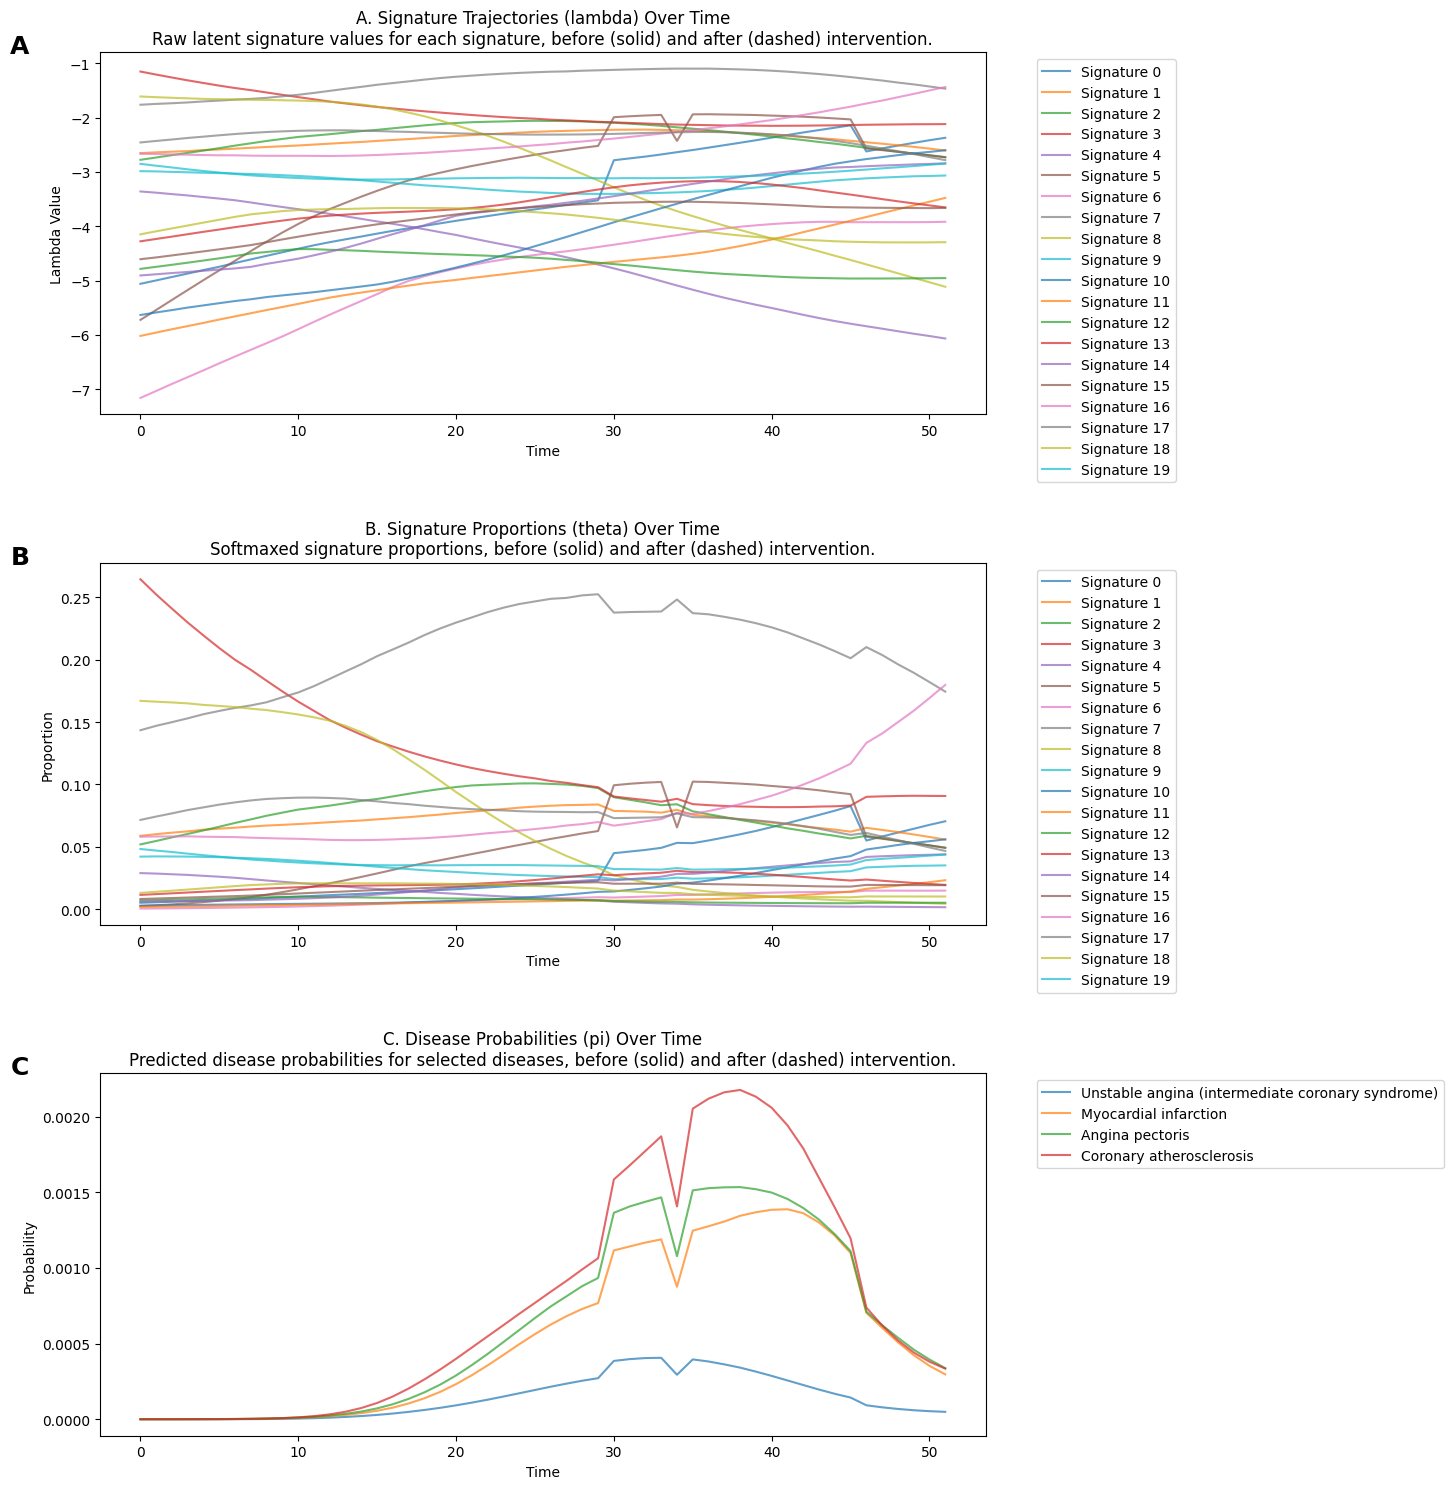

In [151]:

for _, row in person_script.iterrows():
    drug_class = row['category']
    if drug_class not in drug_class_to_signature:
        print(f"Drug class {drug_class} not mapped to a signature, skipping.")
        continue
    signature_idx = drug_class_to_signature[drug_class]
    start_date = row['from']
    end_date = row['to']
    start_time = date_to_time_index(start_date, year_of_birth)
    end_time = date_to_time_index(end_date, year_of_birth)
    # Clamp to model time range
    start_time = max(0, min(start_time, twin_data['lambda'].shape[1]-1))
    end_time = max(0, min(end_time, twin_data['lambda'].shape[1]))
    twin_data = twin_manager.simulate_intervention(
        twin_data,
        intervention_type='reduce',
        target_signature=signature_idx,
        effect_size=0.2,
        start_time=start_time,
        end_time=end_time
    )

# Plot or analyze the effect
twin_manager.plot_twin_trajectories(twin_data, selected_diseases=[111,112,113,114])

In [152]:

# Suppose you have a digital twin for this eid
drug_class_to_signature = {
    'statins': 5,
    'anti_hypertensives': 0,
    'diabetes': 15,
    'antipsychotics': 7, 'steroids': 16


    # etc.
}


In [ ]:
import os
import glob
import numpy as np
import torch
import re



# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 21, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
#np.save('all_lambdas_combined.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Dropbox (Personal)/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

Verifying directory sorting:
/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000
/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_10000_20000
/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_20000_30000
/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_30000_40000
/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_40000_50000

Processing batch 0-10000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_0_10000
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_45365/3657662485.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_10000_20000
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_20000_30000
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_30000_40000
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_40000_50000
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_50000_60000
Batch size: 10000
Current index range: 50000 to 60000

Processing batch 60000-70000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/output_60000_70000
Batc

In [155]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.special import expit

# --- CONFIGURATION ---
batch_size = 10000
results_dir = '/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results'
patient_ids = np.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/patient_ids.npy')

# Load your script data (convert from RDS to CSV or use pyreadr if needed)
script = pd.read_csv('prescription.csv')  #
model_phi = model.phi
disease_names = model.disease_names

# --- FUNCTION TO LOAD LAMBDA FOR AN EID ---
def load_lambda_for_eid(eid, patient_ids, batch_size, results_dir):
    idx = np.where(patient_ids == eid)[0][0]
    batch_start = (idx // batch_size) * batch_size
    batch_end = batch_start + batch_size
    batch_dir = os.path.join(results_dir, f'output_{batch_start}_{batch_end}')
    model_path = os.path.join(batch_dir, 'model.pt')
    checkpoint = torch.load(model_path)
    lambda_batch = checkpoint['model_state_dict']['lambda_'].detach().cpu().numpy()
    idx_in_batch = idx - batch_start
    return lambda_batch[idx_in_batch]

# --- 1. Compute baseline theta for all individuals ---
def compute_theta(lambda_vec):
    exp_lambda = np.exp(lambda_vec)
    return exp_lambda / np.sum(exp_lambda)

all_eids = patient_ids[:400000]  # or whatever range you have
all_thetas = []
for eid in all_eids:
    lambda_individual = load_lambda_for_eid(eid, patient_ids, batch_size, results_dir)
    theta_0 = compute_theta(lambda_individual[:, 0])  # baseline (time 0)
    all_thetas.append(theta_0)
all_thetas = np.array(all_thetas)

# --- 2. Identify treated and untreated individuals ---
drug_class = 'statins'  # or any class you want
treated_eids = set(script[script['category'] == drug_class]['eid'].astype(str).unique())
all_eids_str = [str(eid) for eid in all_eids]
untreated_eids = set(all_eids_str) - treated_eids

treated_indices = [i for i, eid in enumerate(all_eids_str) if eid in treated_eids]
untreated_indices = [i for i, eid in enumerate(all_eids_str) if eid in untreated_eids]

# --- 3. Match treated to untreated by baseline theta ---
treated_thetas = all_thetas[treated_indices]
untreated_thetas = all_thetas[untreated_indices]

nn = NearestNeighbors(n_neighbors=1, metric='euclidean').fit(untreated_thetas)
distances, indices = nn.kneighbors(treated_thetas)

# --- 4. Compare outcomes for matched pairs ---
for i, treated_idx in enumerate(treated_indices):
    untreated_idx = untreated_indices[indices[i][0]]
    # Load full lambda trajectories
    lambda_treated = load_lambda_for_eid(all_eids[treated_idx], patient_ids, batch_size, results_dir)
    lambda_untreated = load_lambda_for_eid(all_eids[untreated_idx], patient_ids, batch_size, results_dir)
    # Compute theta and pi over time
    theta_treated = np.exp(lambda_treated) / np.sum(np.exp(lambda_treated), axis=0)
    theta_untreated = np.exp(lambda_untreated) / np.sum(np.exp(lambda_untreated), axis=0)
    pi_treated = np.einsum('kt,kdt->dt', theta_treated, expit(model_phi))
    pi_untreated = np.einsum('kt,kdt->dt', theta_untreated, expit(model_phi))
    # Example: print or plot for a specific disease
    disease_idx = 111  # e.g., coronary artery disease
    import matplotlib.pyplot as plt
    plt.plot(pi_treated[disease_idx], label='Treated')
    plt.plot(pi_untreated[disease_idx], label='Untreated')
    plt.title(f'Disease risk trajectory for disease {disease_names[disease_idx]}')
    plt.legend()
    plt.show()
    # Optionally, break after first pair for demo
    break

# --- You can extend this to batch process, save results, or analyze all pairs ---

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/47316182.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


KeyboardInterrupt: 

In [156]:
import numpy as np

patient_ids = np.load('patient_ids.npy')
first_patient_id = patient_ids[0]
print("First patient ID:", first_patient_id)

FileNotFoundError: [Errno 2] No such file or directory: 'patient_ids.npy'

In [158]:
base_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results'

In [ ]:
base_dir='/Users/sarahurbut/Dropbox (Personal)/from_AWS/resultstraj/'

In [159]:
import os
import glob
import numpy as np
import torch
import re



# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 21, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
#np.save('all_lambdas_combined.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Library/CloudStorage/Dropbox/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

Verifying directory sorting:
/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_0_10000
/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_10000_20000
/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_20000_30000
/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_30000_40000
/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_40000_50000

Processing batch 0-10000
Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_0_10000
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/3933894081.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_10000_20000
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_20000_30000
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_30000_40000
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_40000_50000
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/output_50000_60000
Batch size: 10000
Current index range: 50000 to 60000

Processing batch 60000-70000
Loaded lambda from /Users/sarahurbut/Lib

In [161]:
np.save('all_lambdas_combined.npy', all_lambdas)

In [160]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)


# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T



/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_39842/1460757963.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T
